In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0401.csv'
case0401 = pd.read_csv(path)
case0401.head()

,Incidents,Launch
0,1,Cool
1,1,Cool
2,1,Cool
3,3,Cool
4,0,Warm


The distribution of the numbers is so nonnormal that a t-distribution approximation is severely inadequate.

No transformation helps.

The rank-sum test is inadequate because of the large number of ties: 17 of the 24 values are tied at zero.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

[1.5, 0.2, 1.3]


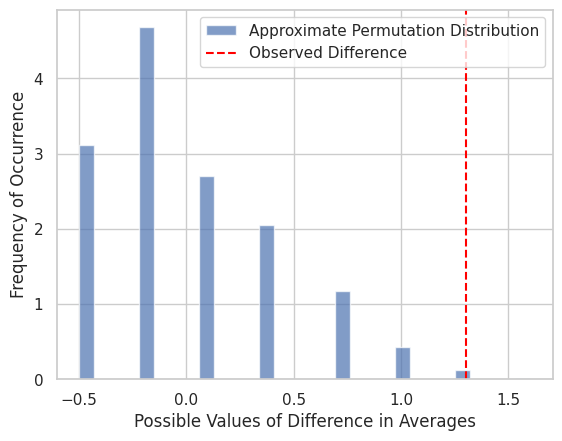

p-value: 0.0096


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate means for 'Cool' and 'Warm' launches
mCool = np.mean(case0401.loc[case0401['Launch'] == 'Cool', 'Incidents'])
mWarm = np.mean(case0401.loc[case0401['Launch'] == 'Warm', 'Incidents'])

mDiff = mCool - mWarm
print([mCool, mWarm, mDiff])  # Show the values of these variables

# PERMUTATION TEST, VIA REPEATED RANDOM RE-GROUPING (ADVANCED)
numRep = 10000
rDiff = np.zeros(numRep)

for rep in range(numRep):
    random_group = np.full(24, "rWarm")
    random_group[np.random.choice(24, 4, replace=False)] = "rCool"
    mW = np.mean(case0401.loc[random_group == 'rWarm', 'Incidents'])
    mC = np.mean(case0401.loc[random_group == 'rCool', 'Incidents'])
    rDiff[rep] = mC - mW

# Histogram of difference in averages from numRep random groupings
plt.hist(rDiff, bins=30, density=True, alpha=0.7,
         label="Approximate Permutation Distribution")
plt.axvline(x=mDiff, color='red', linestyle='--', label="Observed Difference")
plt.xlabel("Possible Values of Difference in Averages")
plt.ylabel("Frequency of Occurrence")
plt.legend()
plt.show()

# 1-sided p-value
p_value = np.sum(rDiff >= mDiff) / numRep
print("p-value:", p_value)


A general approach to Permutation test.

In [ ]:
import numpy as np
from sklearn.utils import resample

# Example data for two samples
sample1 = np.array(case0401.loc[case0401['Launch'] == 'Cool', 'Incidents'])
sample2 = np.array(case0401.loc[case0401['Launch'] == 'Warm', 'Incidents'])

# Observed test statistic (e.g., difference in means)
observed_statistic = np.mean(sample1) - np.mean(sample2)

# Number of permutations
num_permutations = 10000

# Initialize an array to store permuted statistics
permuted_statistics = np.zeros(num_permutations)

# Perform permutation test
for i in range(num_permutations):
    # Combine the samples
    combined_data = np.concatenate([sample1, sample2])

    # Permute the combined data
    permuted_data = resample(combined_data)

    # Calculate the test statistic for the permuted data
    permuted_statistic = np.mean(permuted_data[:len(sample1)]) - np.mean(permuted_data[len(sample1):])
    permuted_statistics[i] = permuted_statistic

# Calculate one-sided p-value for the observed statistic
one_sided_p_value = np.sum(permuted_statistics >= observed_statistic) / num_permutations

# Calculate two-sided p-value for the observed statistic
two_sided_p_value = (np.sum(permuted_statistics >= observed_statistic)
                           + np.sum(permuted_statistics <= -observed_statistic)) / num_permutations

print(f'one sided p-value = {one_sided_p_value}')

print(f'two sided p-value = {two_sided_p_value}')

one sided p-value = 0.0077
two sided p-value = 0.0078


# Rank sum test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, wilcoxon
sns.set(style="whitegrid")
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0402.csv'
case0402 = pd.read_csv(path)
case0402.head()

,Time,Treatment,Censored
0,68,Modified,0
1,70,Modified,0
2,73,Modified,0
3,75,Modified,0
4,77,Modified,0


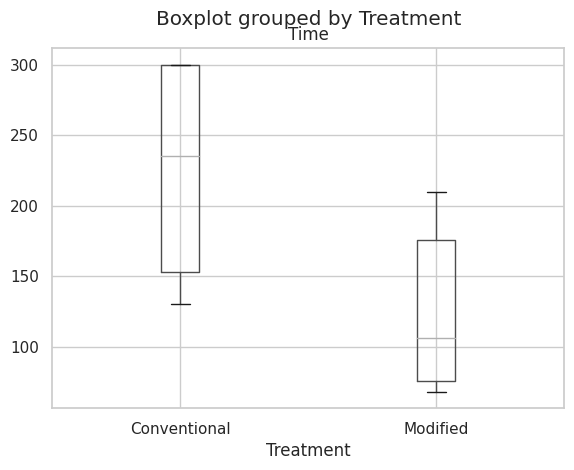

Median Difference: 129.0
Wilcoxon Rank-Sum Test (Greater):
Statistic: 164.0
p-value: 0.0012711588792242423

Wilcoxon Rank-Sum Test (Two-Sided):
Statistic: 164.0
p-value: 0.0025423177584484847


In [ ]:

# Boxplot
case0402.boxplot(column='Time', by='Treatment')
plt.show()

# Calculate the difference in medians
median_diff = np.median(case0402.loc[case0402['Treatment'] == 'Conventional', 'Time']) - \
              np.median(case0402.loc[case0402['Treatment'] == 'Modified', 'Time'])

print("Median Difference:", median_diff)

# Rank-sum test (Mann-Whitney U test) - one-sided
statistic, p_value_greater = mannwhitneyu(case0402.loc[case0402['Treatment'] == 'Conventional', 'Time'],
                                      case0402.loc[case0402['Treatment'] == 'Modified', 'Time'],
                                      alternative='greater', use_continuity=True)

print("Wilcoxon Rank-Sum Test (Greater):")
print("Statistic:", statistic)
print("p-value:", p_value_greater)

# Rank-sum test (Mann-Whitney U test) - two-sided
statistic, p_value_two_sided = mannwhitneyu(case0402.loc[case0402['Treatment'] == 'Conventional', 'Time'],
                                         case0402.loc[case0402['Treatment'] == 'Modified', 'Time'], use_continuity=True)


print("\nWilcoxon Rank-Sum Test (Two-Sided):")
print("Statistic:", statistic)
print("p-value:", p_value_two_sided)



In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

data_conventional = case0402.loc[case0402['Treatment'] == 'Conventional', 'Time']
data_modified = case0402.loc[case0402['Treatment'] == 'Modified', 'Time']


# Observed rank-sum test statistic
observed_statistic, p_value_observed = mannwhitneyu(data_conventional, data_modified)

# Define hypothesized values for ı
hypothesized_values = np.arange(-100, 200, 1)  # Adjust the range as needed

# Initialize confidence interval bounds
lower_bound = None
upper_bound = None

# Perform rank-sum test for each hypothesized ı
for ı in hypothesized_values:
    # Add ı to all modified group times
    modified_group_with_hypothesis = data_modified + ı

    # Perform rank-sum test
    _, p_value = mannwhitneyu(data_conventional, modified_group_with_hypothesis)

    # Check if p-value exceeds 0.05 (two-sided test)
    if p_value >= 0.05:
        # Update confidence interval bounds
        if lower_bound is None:
            lower_bound = ı
        upper_bound = ı

# Display confidence interval
print("95% Confidence Interval for Additive Treatment Effect (ı):")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


95% Confidence Interval for Additive Treatment Effect (ı):
Lower Bound: 58
Upper Bound: 159


#___________schizophrenia  study - Signed rank test ______________

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, wilcoxon
sns.set(style="whitegrid")
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/case0202.csv'
case0202 = pd.read_csv(path)
case0202.head()

,Unaffected,Affected
0,1.94,1.27
1,1.44,1.63
2,1.56,1.47
3,1.58,1.39
4,2.06,1.93


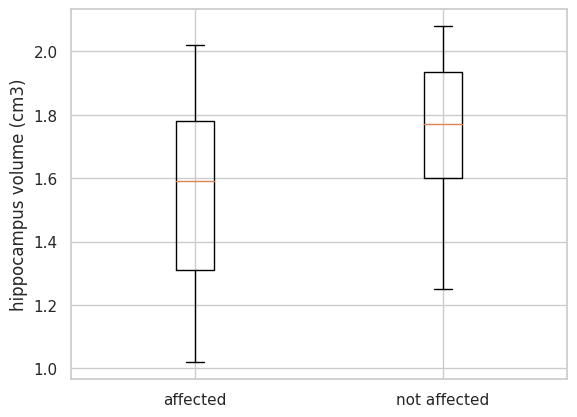

In [ ]:
# Box plot
plt.boxplot([case0202['Affected'], case0202['Unaffected']], labels=["affected", "not affected"])
plt.ylabel("hippocampus volume (cm3)")
plt.show()

In [ ]:
# Shapiro-Wilk test for normality
shapiro_affected = shapiro(case0202['Affected'])
print("Shapiro-Wilk test for 'Affected':", shapiro_affected)
shapiro_unaffected = shapiro(case0202['Unaffected'])
print("Shapiro-Wilk test for 'Unaffected':", shapiro_unaffected)

Shapiro-Wilk test for 'Affected': ShapiroResult(statistic=0.9576737284660339, pvalue=0.6520476937294006)
Shapiro-Wilk test for 'Unaffected': ShapiroResult(statistic=0.9540042877197266, pvalue=0.5895637273788452)


`method='exact' is used when len(d) <= 50 and there are no zeros;

otherwise, method='approx' is used.

In [ ]:
# Wilcoxon signed-rank test
wilcoxon_result_two_sided = wilcoxon(case0202['Unaffected'], case0202['Affected'], alternative='two-sided', method = 'approx', correction = True)
print("Wilcoxon signed-rank test (two-sided):", wilcoxon_result_two_sided)

Wilcoxon signed-rank test (two-sided): WilcoxonResult(statistic=9.0, pvalue=0.004128050101717339)


In [ ]:
# Wilcoxon signed-rank test for one-sided alternative
wilcoxon_result_greater = wilcoxon(case0202['Unaffected'], case0202['Affected'], alternative='greater', method = 'approx', correction = True)
print("Wilcoxon signed-rank test (greater):", wilcoxon_result_greater)

Wilcoxon signed-rank test (greater): WilcoxonResult(statistic=111.0, pvalue=0.0020640250508586694)


# confidence interval by trail and error

In [ ]:
# Observed rank-sum test statistic
observed_statistic, p_value_observed = wilcoxon(case0202['Unaffected'], case0202['Affected'], alternative='two-sided', method = 'approx', correction = True)

# Define hypothesized values for ı
hypothesized_values = np.arange(-1, 10, 0.001)  # Adjust the range as needed

# Initialize confidence interval bounds
lower_bound = None
upper_bound = None

# Perform rank-sum test for each hypothesized ı
for ı in hypothesized_values:
    # Add ı to all modified group times
    modified_group_with_hypothesis = case0202['Affected'] + ı

    # Perform rank-sum test
    _, p_value = wilcoxon(modified_group_with_hypothesis,case0202['Unaffected'], alternative='two-sided', method = 'approx', correction = True)

    # Check if p-value exceeds 0.05 (two-sided test)
    if p_value >= 0.05:
        # Update confidence interval bounds
        if lower_bound is None:
            lower_bound = ı
        upper_bound = ı

# Display confidence interval
print("95% Confidence Interval:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

95% Confidence Interval:
Lower Bound: 0.06500000000000083
Upper Bound: 0.3440000000000012


#Marijuana study-----------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_rel, wilcoxon, ttest_1samp
sns.set(style="whitegrid")
path = 'drive/My Drive/Colab Notebooks/MATH3450/sleuth3csv/ex0432.csv'
ex0432 = pd.read_csv(path)
ex0432.head()

,Subject,Marijuana,Placebo
0,1,15,23
1,2,25,50
2,3,0,0
3,4,0,99
4,5,4,31


In [ ]:
ex0432.shape

(15, 4)

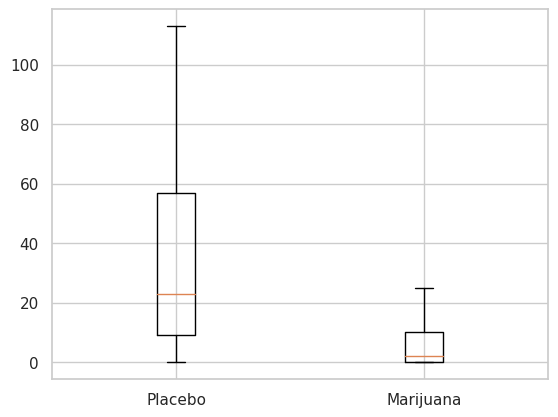

In [ ]:
# Box plot
plt.boxplot([ex0432['Placebo'], ex0432['Marijuana']], labels=["Placebo", "Marijuana"])
plt.show()

In [ ]:
# Calculate differences
ex0432['Diff'] = ex0432['Placebo'] - ex0432['Marijuana']

# Display the first few rows of the modified DataFrame
print(ex0432.head())

   Subject  Marijuana  Placebo  Diff
0        1         15       23     8
1        2         25       50    25
2        3          0        0     0
3        4          0       99    99
4        5          4       31    27


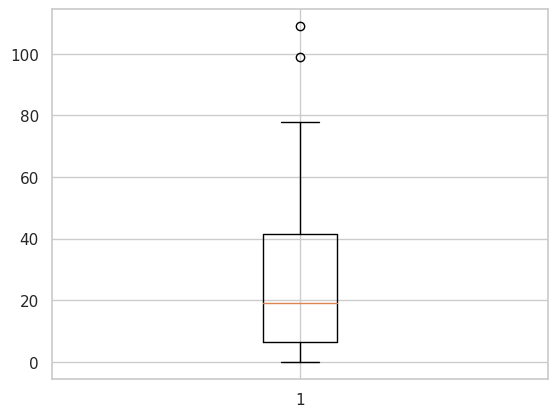

In [ ]:
# Box plot of differences
plt.boxplot(ex0432['Diff'])
plt.show()

In [ ]:
# Filter differences less than or equal to 0
filtered_diff = ex0432[ex0432['Diff'] <= 0]

# Display filtered DataFrame
print(filtered_diff)

   Subject  Marijuana  Placebo  Diff
2        3          0        0     0
9       10          0        0     0


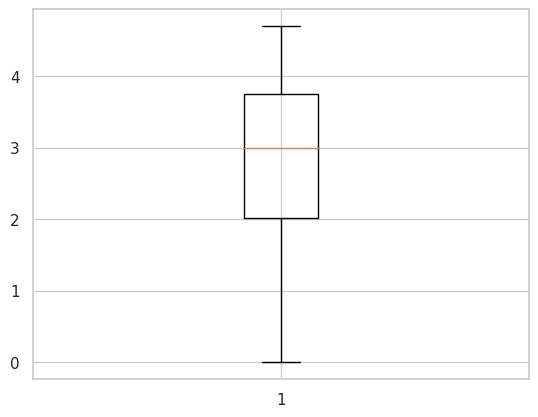

In [ ]:
# Box plot of log-transformed differences
plt.boxplot(ex0432['Diff'].apply(lambda x: np.log(x + 1)))
plt.show()

In [ ]:
# Shapiro-Wilk test for differences
shapiro_result = shapiro(ex0432['Diff'])
print("Shapiro-Wilk test:", shapiro_result)

Shapiro-Wilk test: ShapiroResult(statistic=0.8093942403793335, pvalue=0.004864863585680723)


In [ ]:
# Shapiro-Wilk test for log-transformed differences
shapiro_result = shapiro(ex0432['Diff'].apply(lambda x: np.log(x + 1)))
print("Shapiro-Wilk test:", shapiro_result)

Shapiro-Wilk test: ShapiroResult(statistic=0.9306524991989136, pvalue=0.2790678143501282)


In [ ]:
# Paired t-test for log-transformed differences
ttest_result = ttest_1samp(ex0432['Diff'].apply(lambda x: np.log(x + 1)), popmean = 0)
print("Paired t-test:", ttest_result)

Paired t-test: TtestResult(statistic=7.290622267535895, pvalue=3.966589734533219e-06, df=14)


In [ ]:
ttest_result.confidence_interval()

ConfidenceInterval(low=1.94503788129694, high=3.566423287322183)

`method='exact' is used when len(d) <= 50 and there are no zeros;

otherwise, method='approx' is used.

In [ ]:
ex0432['Diff'].apply(lambda x: np.log(x + 1)).mean()

2.7557305843095614

In [ ]:
# Wilcoxon signed-rank test
wilcoxon_result = wilcoxon(ex0432['Marijuana'], ex0432['Placebo'], alternative='two-sided', mode='auto', correction = True)
print("Wilcoxon signed-rank test:", wilcoxon_result)

Wilcoxon signed-rank test: WilcoxonResult(statistic=0.0, pvalue=0.0016616944579835073)


In [ ]:
# Wilcoxon signed-rank test
wilcoxon_result = wilcoxon(ex0432['Marijuana'], ex0432['Placebo'], alternative='two-sided', mode='exact', correction = True)
print("Wilcoxon signed-rank test:", wilcoxon_result)

Wilcoxon signed-rank test: WilcoxonResult(statistic=0.0, pvalue=0.0016616944579835073)
